In [9]:
from PIL import Image
import numpy as np
import os
from rawkit.raw import Raw
import scipy
from mpldatacursor import datacursor
from scipy import ndimage
import warnings,glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib nbagg
    import matplotlib.pyplot as plt
    import matplotlib
files = glob.glob("dark_m33/*.cr2")
print(len(files))

120


In [10]:
s = None
for f in files:
    with Raw(filename=f) as raw:
        im, cdesc = raw.bayer_data(include_margin=False)
        im = np.array(im, dtype=np.int64)
    if s is None:
        s = im
    else:
        s += im

/Users/rein/git/rebound/venv/lib/python3.5/site-packages/rawkit/raw.py:269: UserWarning: The image is flipped.
  "The image is flipped."


<IPython.core.display.Javascript object>


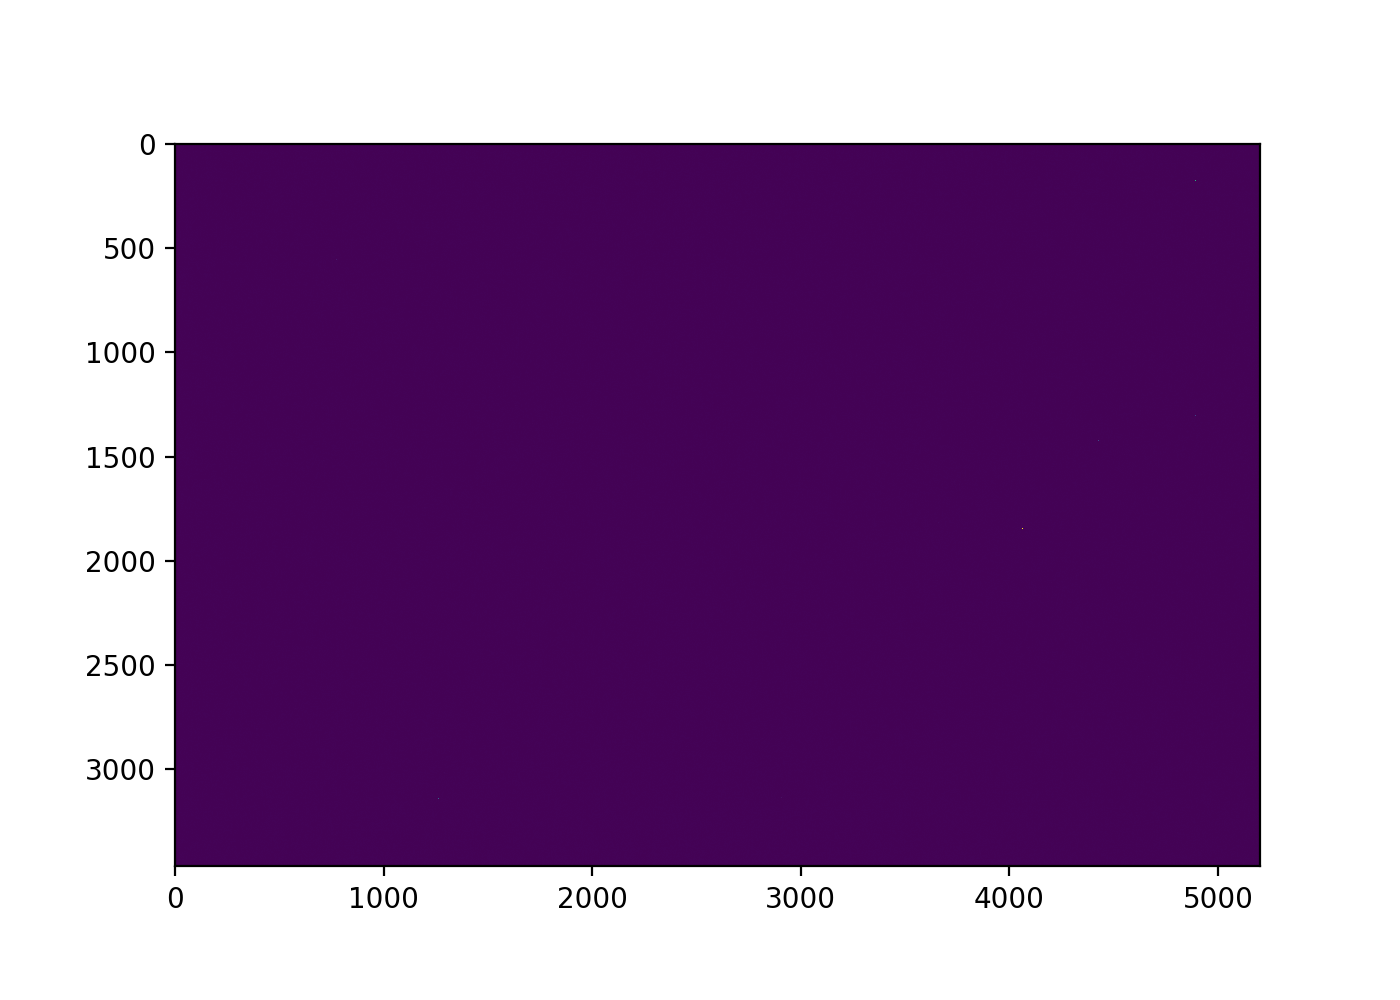

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(s)

In [12]:
np.save("dark_m33.npy",s//len(files))